# Visualisation
In this tutorial we will plot the data obtained from device characterisation. Specifically, this module provides a few different ways to visualise the correlations in readout between qubit pairs. In QREM those correlations are quantified by correlation coefficients, which intuitively tell us how much the change of state of on one qubit affects the readout on the other. Here we will plot those correlation coefficients on a device layout graph, on a histogram and as a heat-map.
Having the correlation coefficients, one can also divide all the qubits into disjoint clusters, in such a way that the qubits in one cluster affect each other the most. Such a division helps create a model of the readout noise which is still feasible to mitigate, even in big devices, but which doesn't disregard crosstalk. This module allows for plotting those clusters as well.

The visualisation module needs as input the device layout, the list of qubits of the device which were considered in characterization (some are ommitted due to low gate fidelity) and the correlation coefficients. It can also take the clusters list. Some default device layouts are available (for Rigetti and IBM devices) but the user can also input their own.

The module outputs png images.

### Imports
We first need the necessary imports from this visualisation module. Note that you need manim and dependencies installed (for details see the README file). The ResultsForPlotting is the main class of the module, which takes in the data and interfaces with manim classes. Tutorial_simulator is one of the device layouts which are available here by default.

In [1]:
import numpy as np

from qrem.visualisation.visualisation import ResultsForPlotting
from qrem.visualisation.device_constants import tutorial_simulator

Manim Community v0.17.2

### Passing the data
We now create a dictionary which contains data about the results of the characterisation experiment. This creation is for the purpose of the tutorial and uses random numbers. The user can alternatively input actual experimental data, using an analogous data structure.
The 'used_qubits' dictionary key stands for the qubits which were used for characterisation. It has to be a list of qubit indices, which are contained in the list of all qubit indices of the device which will be plotted (see device_data_dictionary below). If a qubit is on the list of device qubits but not on the list of used qubits, it will be grayed out on the plot on the device and not included in the heatmap.
The 'correlations' key stands for the correlation coefficients between qubit pairs. They are passed as a numpy array of size len(used_qubits) x len(used_qubits). The element [i][j] of the array signifies how much the i-th qubit affects the j-th qubit.

In [2]:
random_correlations_array = np.random.rand(4, 4) * np.random.rand(4,4) / 4
# We set the correlation coefficient of a qubit with itself to 0 (just as a convention):
np.fill_diagonal(random_correlations_array, 0)
experiment_dictionary = {'used_qubits': [0, 2, 3, 4],
                         'correlations': random_correlations_array}

### Creating instance of the plotting class
We are now ready to create an object whose methods will create the plots. As arguments, we pass the experiment_data_dictionary, of the form explained above and a device_data_dictionary.

In [3]:
experiment_instance = ResultsForPlotting(device_data_dictionary=tutorial_simulator,     experiment_data_dictionary=experiment_dictionary)

 Here we used one of the devices whose data is available by default in the module, called 'tutorial_simulator', imported from the device_constants file. We can print out the tutorial_simulator dictionary to see its structure. The user can plot any device by describing it with an analogous dictionary. The 'no_qubits' value signifies the total number of qubits in the device. The 'edges_in_layout' are the graph edges present in device layout. The 'layout' contains the x, y, z coordinates of the vertices (qubits). The 'vertex_labels' contains the labels of consecutive qubits (in principle they don't have to be consecutive integers, see e.g. Rigetti devices). The 'scale' key regulates how big the device is plotted in the picture and can be set to 1.0 by default.

In [4]:
print(tutorial_simulator)

{'no_qubits': 5, 'edges_in_layout': [(0, 1), (1, 2), (1, 3), (3, 4)], 'layout': {0: [0, 0, 0], 1: [1, 0, 0], 2: [2, 0, 0], 3: [1, 1, 0], 4: [1, 2, 0]}, 'vertex_labels': [0, 1, 2, 3, 4], 'scale': 1.0}


### Plotting correlation coefficients
We can now plot the correlation coefficients on the device layout. We use the draw_on_layout method. The 'what_to_draw' argument has two possible values. 'basic_layout' will plot the device layout, with no correlation data. 'correlations_above_threshold' will plot arrows between qubits, corresponding to correlation coefficients which are greater or equal to some correlation threshold (0.0-1.0 range). This threshold is passed as the argument 'correlations_threshold'. The plotted arrows' colors signify the magnitude of correlations, with the scale shown on the right of the image. The qubits which take part in these correlations above threshold are plotted in a darker gray.
This method, when called, creates a png image with name 'what_to_draw' in a new folder .\media\images and opens it in the user's default image-viewing program (this can be turned off by setting preview=False). It has optional arguments: quality (str), preview (bool), file_name (str), verbosity (str). For details see the description of the method in class visualisation.ResultsForPlotting.


In [5]:
what_to_draw = 'correlations_above_threshold' # can also be set to 'basic_layout'
experiment_instance.draw_on_layout(what_to_draw=what_to_draw, correlations_threshold=0.10)

The plotted image can also be opened from the jupyter notebook, by accessing its location and name (here by default set to 'what_to_draw').

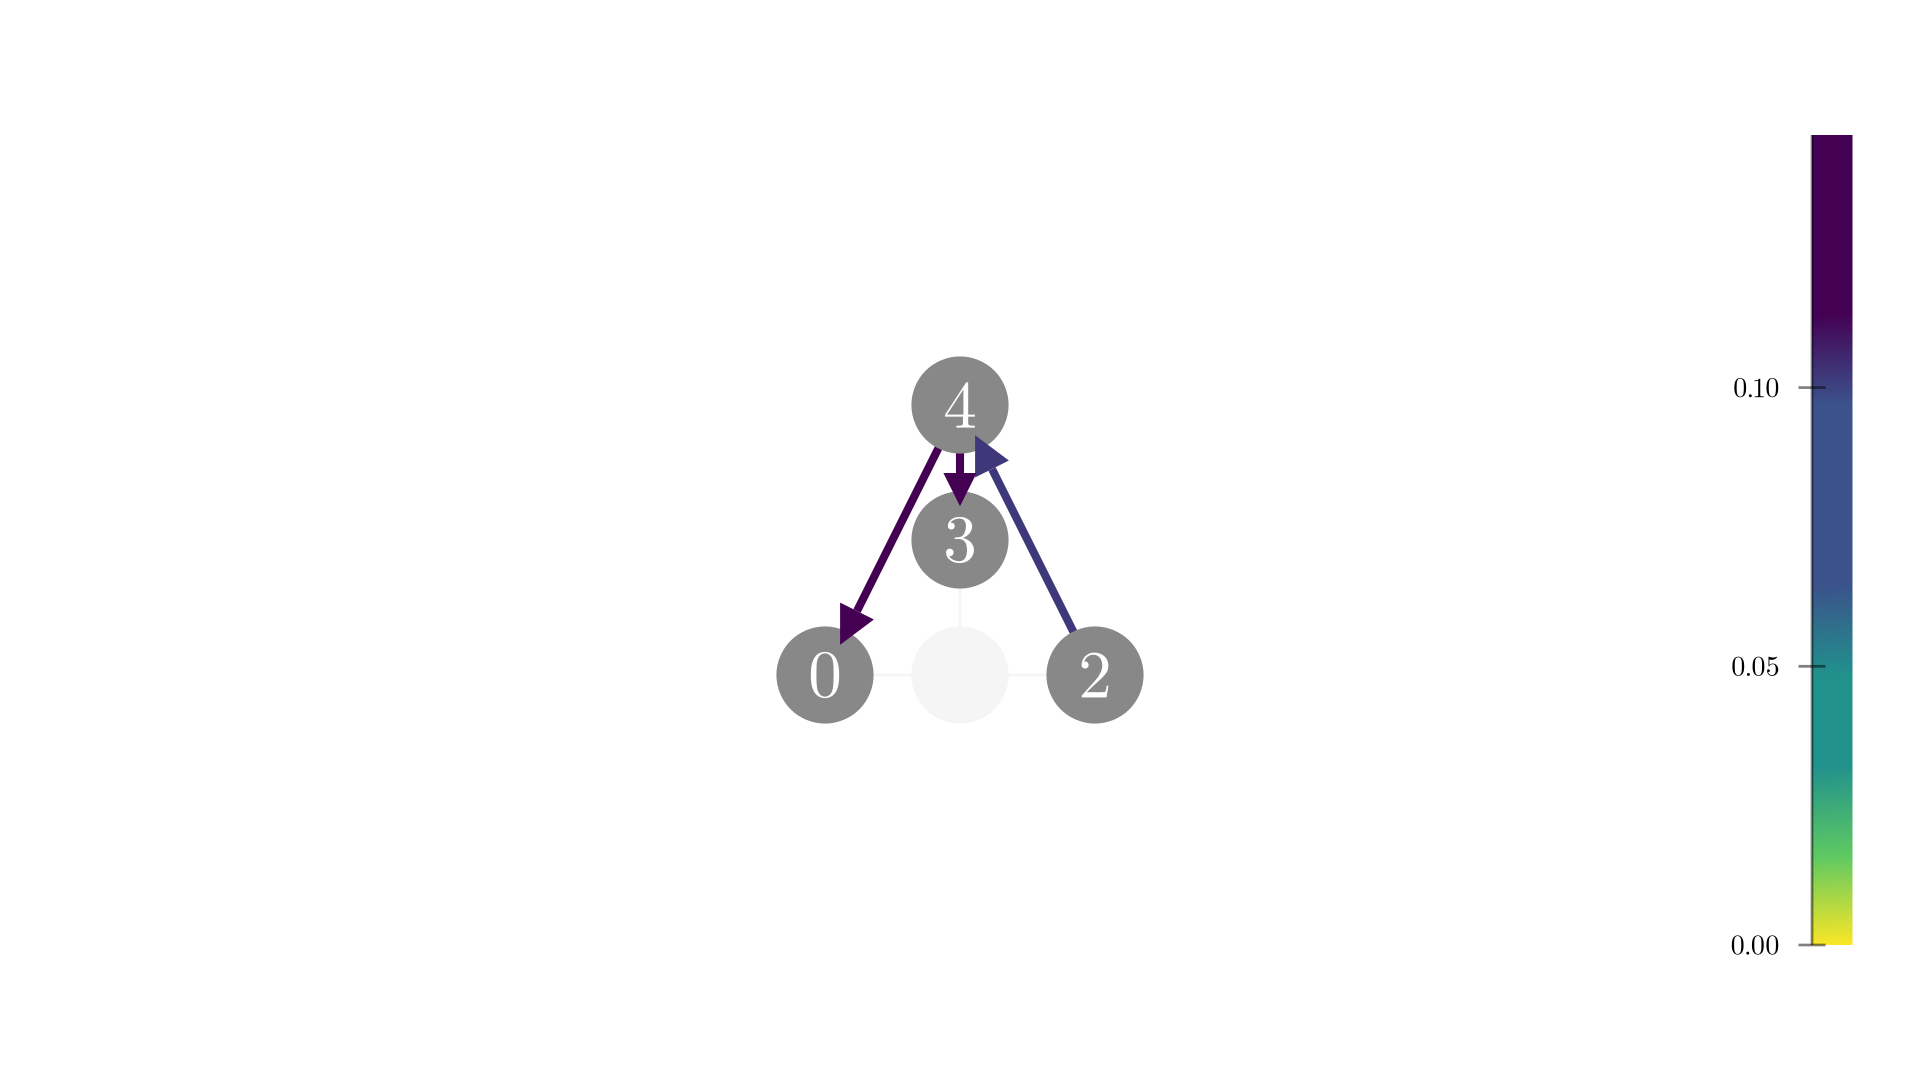

In [6]:
from IPython.display import Image
import os
cwd = os.getcwd()
directory_image = f"{cwd}\media\images\\{what_to_draw}.png"
Image(directory_image)

We can also plot the same correlations data on a histogram or a heatmap. Both the methods draw_histogram and draw_heatmap of the ResultsForPlotting class can be called without any arguments, but here the optional arguments are listed with their default values for clarity. Both the methods create png images with names 'file_name' in directory 'directory'. These plots are automatically shown in the jupyter notebook.

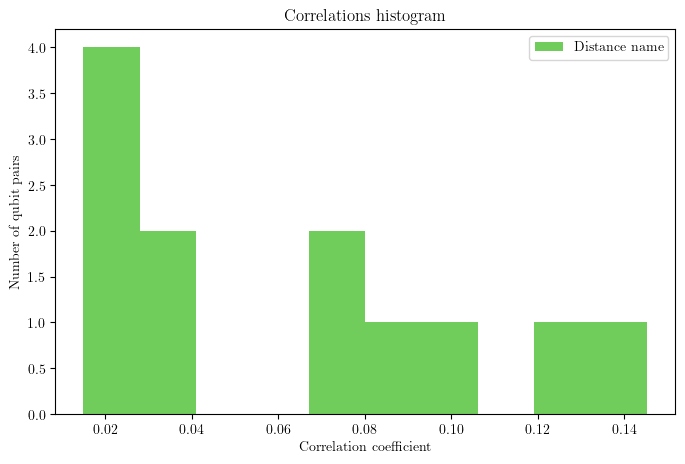

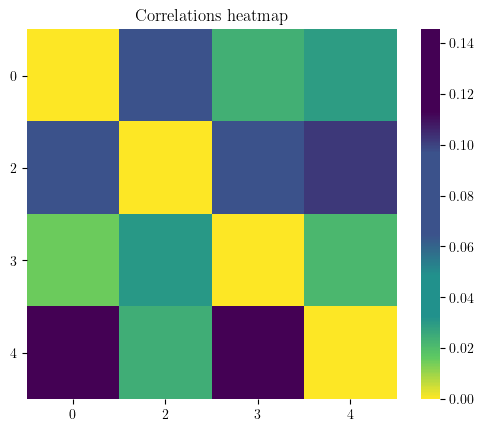

In [7]:
experiment_instance.draw_histogram(file_name='correlations_histogram', directory='', plot_title='Correlations histogram', plot_label='Distance name')
experiment_instance.draw_heatmap(file_name='correlations_heatmap', directory='',  plot_title='Correlations heatmap')

### Plotting clusters
One can also plot the division of qubits into aforementioned clusters. For that we need to set the clusters_list attribute of our experiment_instance. Here we will manufacture some random cluster assignment, for the tutorial's sake. The user can of course use clusters constructed from experimental data using QREM's characterization functionalities and pass them analogously, as a list of lists.

In [9]:
experiment_instance.set_clusters_list([[1, 2], [0, 3, 4]])

We now call the class's method draw_clusters. Optional parameters and their default values are: file_name='clusters', quality='high_quality', preview=True, verbosity='CRITICAL' (for details see method's description in class visualisation.ResultsForPlotting). The method saves a png file in folder .\media\images and opens it in the user's default image viewing program.

In [10]:
experiment_instance.draw_clusters(file_name='clusters')

As previously with the correlations on layout, we can directly access the saved file and open it in the jupyter notebook.

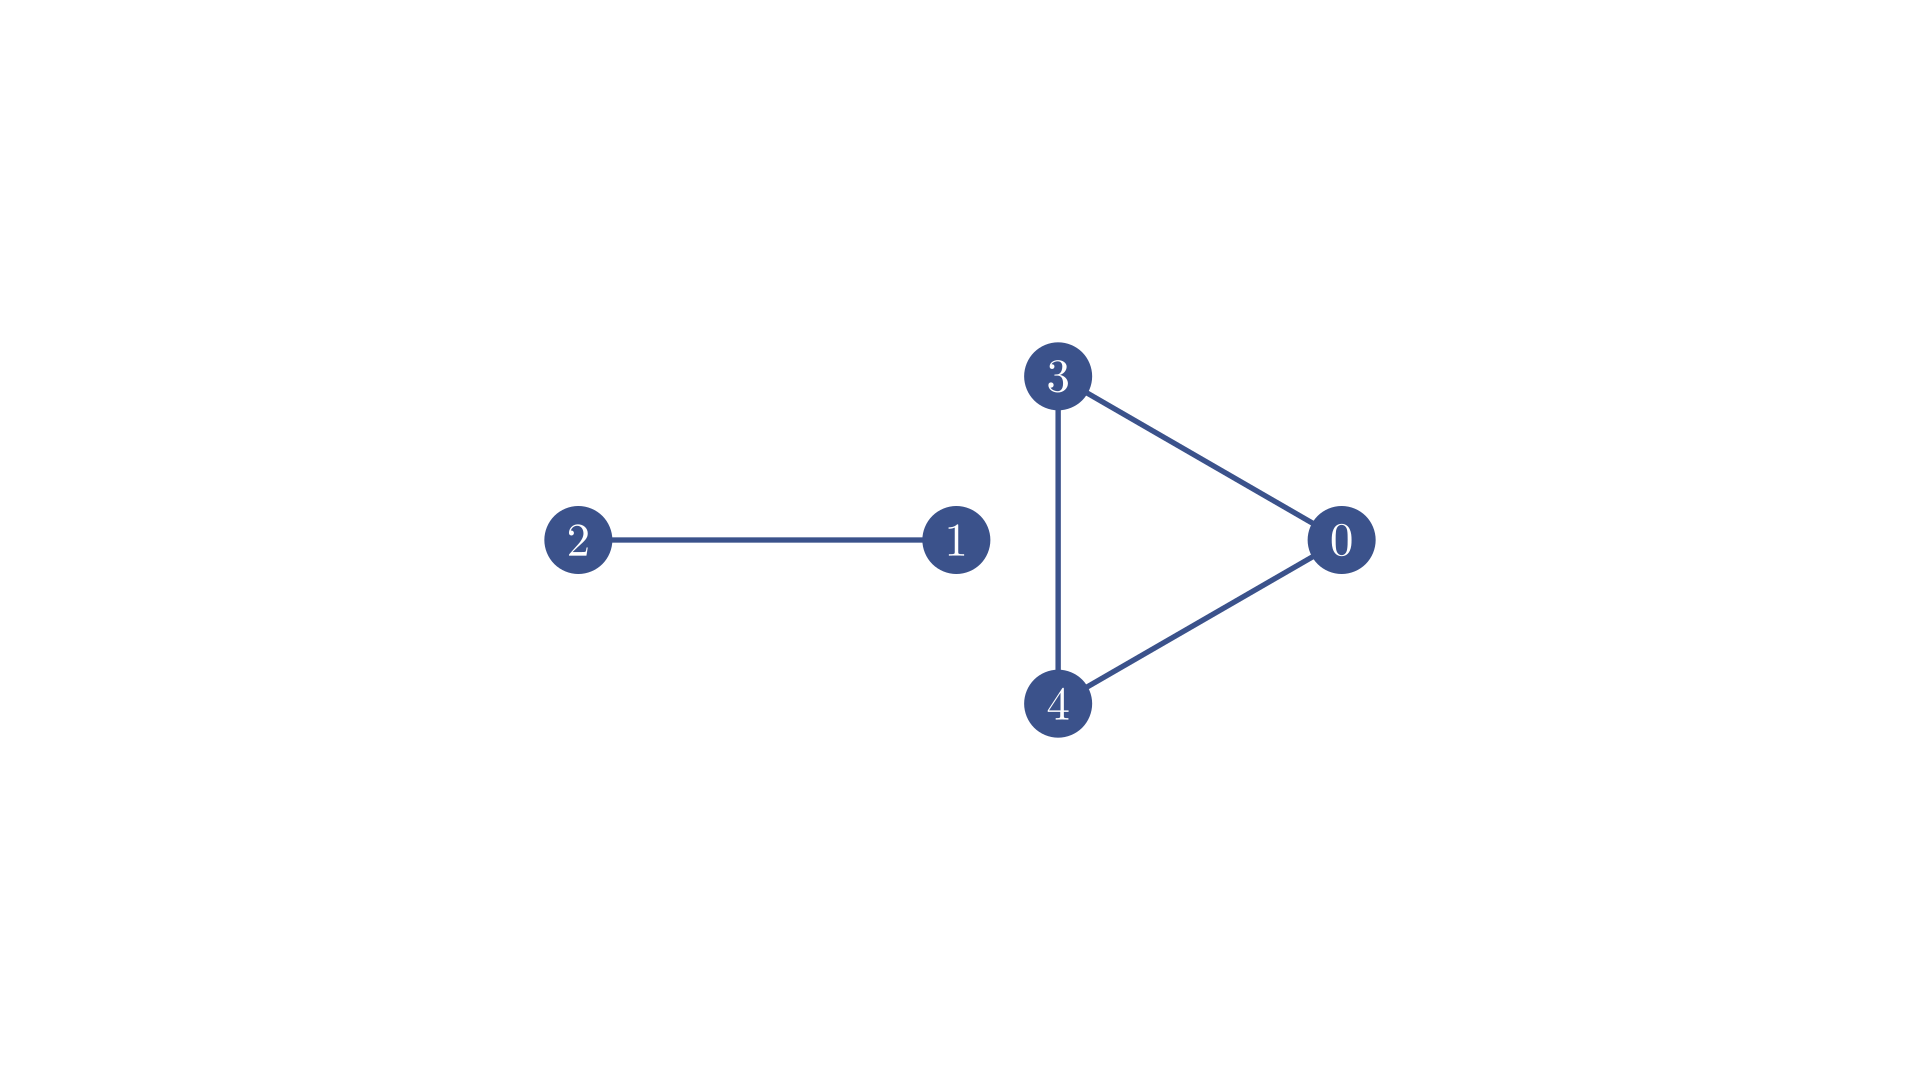

In [11]:
directory_image = f"{cwd}\media\images\\{'clusters'}.png"
Image(directory_image)